Median gap:  2121.0
Locations of long gaps:  [ 265  808 1348 1888 2429 2968]
Times of long gaps:  [50570360. 52157944. 53675210. 55262768. 56740817. 58322707.]
Durations of long gaps:  [214718. 150837. 213511. 108779. 213045. 108580.]
Median gap:  8173.0
Locations of long gaps:  [ 23 474 956]
Times of long gaps:  [4.01558299e+08 4.05512566e+08 4.09874287e+08]
Durations of long gaps:  [ 79760. 212658. 101391.]
Median gap:  8160.0
Locations of long gaps:  [249 759]
Times of long gaps:  [74693623. 79276754.]
Durations of long gaps:  [212529.  98862.]
Median gap:  483.0
Locations of long gaps:  [4339 4850 5361 5873 6384 6895 7407 7918 8173 8429 8940]
Times of long gaps:  [1.35019557e+09 1.35075252e+09 1.35142178e+09 1.35197564e+09
 1.35263609e+09 1.35320193e+09 1.35386473e+09 1.35445786e+09
 1.35487372e+09 1.35514463e+09 1.35569554e+09]
Durations of long gaps:  [ 95744. 202399.  93922. 201601.  96222. 203138. 131537. 201915.  54071.
  91430. 205713.]


<Figure size 2500x2500 with 0 Axes>

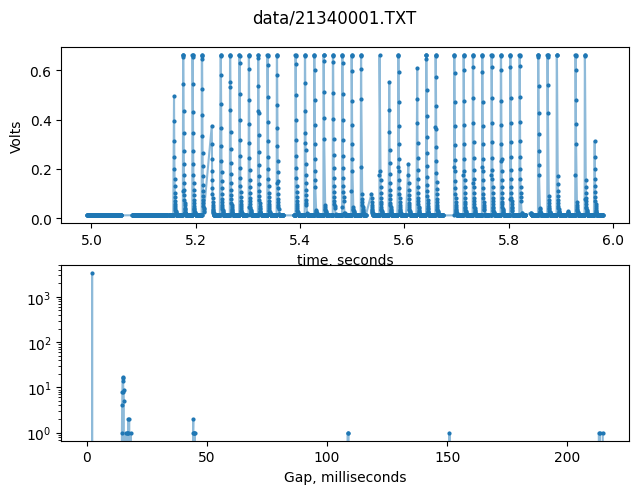

<Figure size 2500x2500 with 0 Axes>

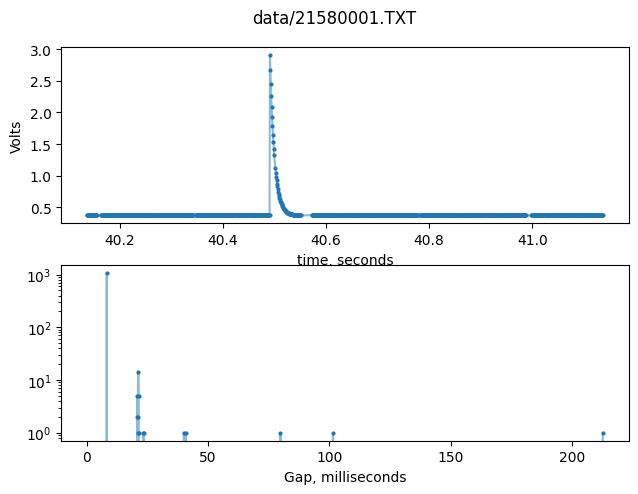

<Figure size 2500x2500 with 0 Axes>

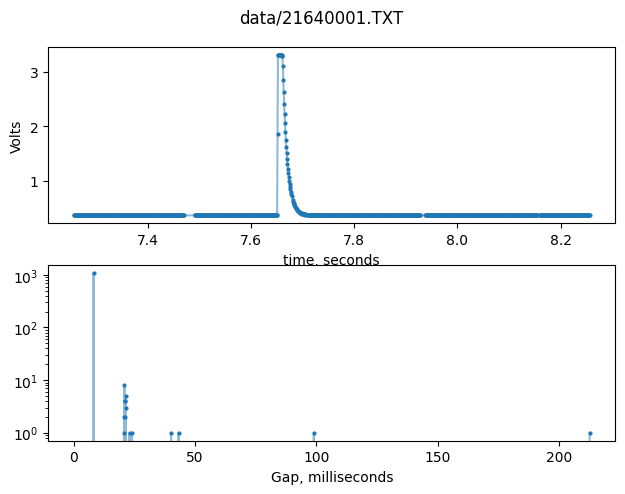

<Figure size 2500x2500 with 0 Axes>

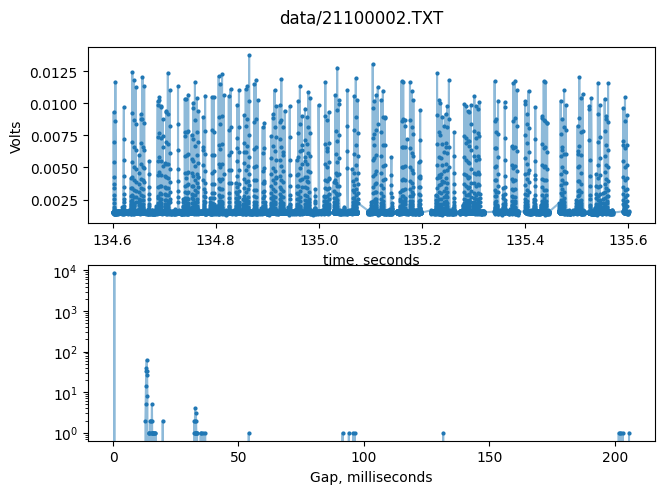

In [18]:
#import matplotlib
#matplotlib.use('TKAgg',force=True)
from matplotlib import pyplot as plt
import numpy as np
import pdb 

def quicklook(infile):
    #read data from file which is the input argument
    
    t,v = np.loadtxt(infile,skiprows=4,unpack=True,delimiter=',')
    v = v*(3.3/4096)/100
    #Make a list of the time differences (gaps) beween adjacent points:
    dt = t - np.roll(t,1)
    dt = dt[1:]
    print('Median gap: ',np.median(dt))
    h,tax = np.histogram(dt,range=[0,max(dt)],bins=int(max(dt)/100.))

    #print the times, durations,  and positions of the longest gaps:
    w = np.where(dt > 50000.)
    w=w[0]
    print('Locations of long gaps: ',w)
    print('Times of long gaps: ',t[w])
    print('Durations of long gaps: ',dt[w])

    #plot dataset
    plt.figure(num=None,figsize=(25,25) )
    fig, axs = plt.subplots(2)
    fig.tight_layout()
    fig.suptitle(infile)
    fig.subplots_adjust(top=.9)

    ts = t/10e6
    axs[0].scatter(ts,v,s=4)
    axs[0].plot(ts,v,alpha=0.5)
    axs[0].set_xlabel('time, seconds')
    axs[0].set_ylabel('Volts')
    #axs[0].set_xlim([min(ts),min(ts)+40])

    #plot histogram of gaps in milliseconds:
    axs[1].plot(tax[1:]/1000.,h,alpha=0.5)
    axs[1].scatter(tax[1:]/1000.,h,s=4)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Gap, milliseconds')

    # plt.show()   



quicklook("data/21340001.TXT") 
quicklook("data/21580001.TXT") 
quicklook("data/21640001.TXT") 
quicklook("data/21100002.TXT") 
